## Support Vector Machines

<hr>

### Agenda
1. Introduction to Support Vector Machines
2. Maximal Margin Classifier
3. Soft Margin Classifier
2. SVM Algorithm for Classification
3. SVM 
4. SVM for Regression
5. Hyper-parameters in SVM

<hr>

### 1. Introduction to Support Vector Machines
* Supervised Learning method used for Classification, Regression & Outlier Detection
* Effective in higher dimensional data
* In situations where features are more than no of rows (or less data)
* Good for classification problems
* Handles complex relationship
* Handles lots of outliers
* Takes longer to train

### 2. Maximal Margin Classifier
* Objective is to find a line( or hyperplane ) which maximizes the separation between data of different classes
* The distance between the line and the closest data points is referred to as the margin.
* The best or optimal line or hyper-plane is that can separate the two classes is the line that as the largest margin.
* Hyperplane is learnt from training data & objective is to maximize the margin

There are two ways by which Kernal SVM will classify non-linear data.
1. Soft Margin
2. kernel Trick

### 3. Soft Margin Classifier
* In real world, data is always messed up & there is no clear separation of boundries
* With Soft Margin Classifier, few data points are allowed to be misclassified

<img src="https://www.researchgate.net/profile/Catarina_Moreira2/publication/260283043/figure/fig12/AS:297261608259590@1447884098130/Figure-A14-Soft-margin-linear-SVM-classifier.png" width="300px">

* The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. 
* For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. 
* A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. 
* In other words``C`` behaves as a regularization parameter in the SVM.

<img src="Image/svm13.png" width="400" />

### 4. Support Vector Machine
* For data linearly separable, SVM works like above mentioned Soft Margin Classifier
* Data which is non-linearly separable 

<img src="https://cdn-images-1.medium.com/max/1000/1*C3j5m3E3KviEApHKleILZQ.png" width="300px">

* SVM supports configurable kernel functions which has ability to transform data to higher dimension.
* Check if decision boundry exists now to separate the classes in higher dimension.
* Transform the decision boundry to original dimension

### Kernel SVM
* When we can't draw straight line or separate the data linearly
* Kernel Trick: Every kernel has different way to transforming data into higher dimension
* E.g: Linear, Polynomial, RBF, Sigmoid ,etc

<img src="Image/svm14.png" width="300" />

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = make_circles(n_samples=1000, noise=.05, factor=.5)

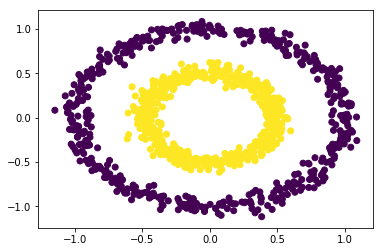

In [8]:
plt.scatter(X[:,0],X[:,1],c=y,)

### Doing transformation manually

In [4]:
col = np.sum(np.square(X),axis=1)

In [5]:
Z  = np.hstack([X,col.reshape(-1,1)])

In [6]:
from mpl_toolkits.mplot3d import Axes3D

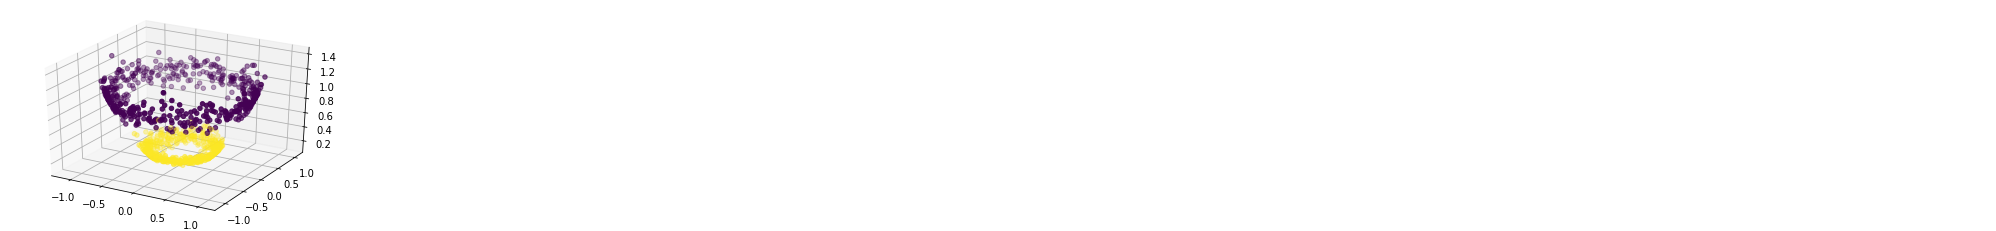

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(xs=Z[:,0],ys=Z[:,1],zs=Z[:,2],c=y)

* Now, we can see a possible plane separating the data
* SVM does all these thing using libraries

0.8746355685131195


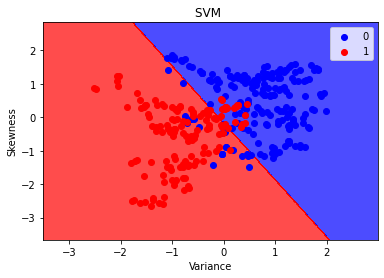

In [4]:
# -*- coding: utf-8 -*-

# Import libraries
import matplotlib.pyplot as plt
import pandas as pd

# Import dataset
dataset = pd.read_csv('Data/Classification/BankNote_Authentication.csv')

X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# SVM
from sklearn.svm import SVC
scm_class = SVC(kernel = 'linear', random_state = 0)
scm_class.fit(X_train, y_train)

pred_test = scm_class.predict(X_test)

from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, pred_test)


print(test_accuracy)

from matplotlib.colors import ListedColormap
import numpy as np
#Define Variables
clf = scm_class
h = 0.01
X_plot, z_plot = X_test, y_test 

#Standard Template to draw graph
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh
Z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,
             alpha = 0.7, cmap = ListedColormap(('blue', 'red')))


for i, j in enumerate(np.unique(z_plot)):
    plt.scatter(X_plot[z_plot == j, 0], X_plot[z_plot == j, 1],
                c = ['blue', 'red'][i], cmap = ListedColormap(('blue', 'red')), label = j)
   #X[:, 0], X[:, 1] 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM ')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.legend()

plt.show()


#### RBF Kernel
* As we see in the above example, linear or polynomial decision boundery cannot separate classes
* RBF is a kernel trick to transform data non-linearly & then predict the separator
<img src="https://blog-c7ff.kxcdn.com/blog/wp-content/uploads/2017/02/kernel.png" width="400" />

In [5]:
# Kernel SVM

# Import libraries
import matplotlib.pyplot as plt
import pandas as pd

# Import dataset
dataset = pd.read_csv('Data/Classification/BankNote_Authentication.csv')

X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# SVM
from sklearn.svm import SVC
scm_class = SVC(kernel = 'rbf', random_state = 0)
scm_class.fit(X_train, y_train)

pred_test = scm_class.predict(X_test)

from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, pred_test)


print(test_accuracy)

0.9271137026239067


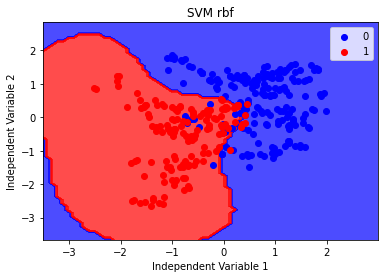

In [7]:
# Visualising the Test set 
from matplotlib.colors import ListedColormap
#Define Variables
clf = scm_class
h = 0.1
X_plot, z_plot = X_test, y_test 

#Template for all Regression
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh
Z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,
             alpha = 0.7, cmap = ListedColormap(('blue', 'red')))


for i, j in enumerate(np.unique(z_plot)):
    plt.scatter(X_plot[z_plot == j, 0], X_plot[z_plot == j, 1],
                c = ['blue', 'red'][i], cmap = ListedColormap(('blue', 'red')), label = j)
   #X[:, 0], X[:, 1] 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM rbf')
plt.xlabel('Independent Variable 1')
plt.ylabel('Independent Variable 2')
plt.legend()

plt.show()

### Understanding Hyper-parameters : C
* The C parameter trades off correct classification of training examples against maximization of the decision function’s margin.
* For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. 
* A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy.

In [22]:
X,Y = make_moons(n_samples=100, noise=.3)

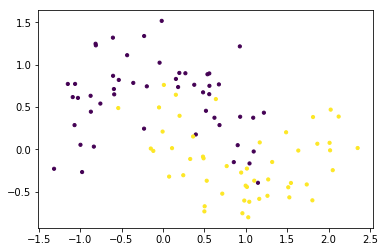

In [23]:
plt.scatter(X[:,0], X[:,1], c=Y, s=10)

In [24]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

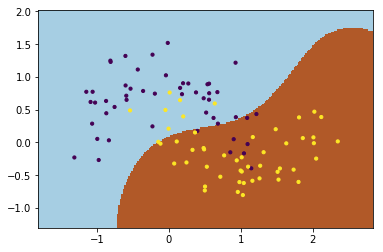

In [25]:
svc = SVC(kernel='rbf', C=0.1)
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)

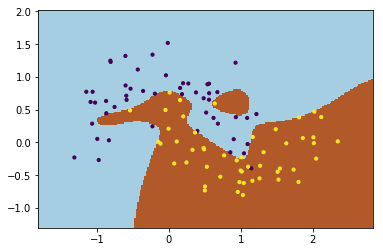

In [26]:
svc = SVC(kernel='rbf', C=100000)
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)

#### Understanding Hyper-parameter : Gamma
* Gamma is a parameter to handle non-linear classification
* By increasing value of gamma, we are increasing importance of each point

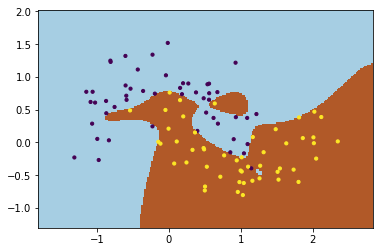

In [27]:
svc = SVC(kernel='rbf', C=100000, gamma=1)
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)

* Using Grid-Search, we need to find right combination of kernel, C & gamma

### SVM for Regression
* Target data is continues in nature
* The relationship between feature data & target can be linear as well as non-linear.
* Based on that the kernel can be chosen - linear, poly or rbf

In [54]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Data/Regression/Company_Performance.csv')
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 1:2].values

#Changing int to float
X = X.astype(float)
y = y.astype(float)

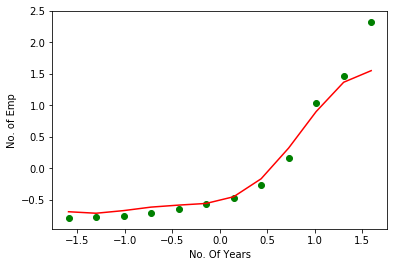

In [55]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

# Fitting SVR 
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
#.ravel will convert that array shape to (n, )
regressor.fit(X, y.ravel()) 


# Predicting on a given value
y_pred = regressor.predict(sc_X.transform(np.array([[7.5]])))
y_pred = sc_y.inverse_transform(y_pred)

# Visualising
plt.scatter(X, y, color = 'green')
plt.plot(X, regressor.predict(X), color = 'red')
plt.ylabel('No. of Emp')
plt.xlabel('No. Of Years')

plt.show()